In [1]:
from spellchecker import correction
from collections import Counter
import pandas as pd

2. Koreksi ejaan untuk menangani salah ketik (Misal: yagn --> dikoreksi menjadi yang)
3. Word normalization untuk menangani lenghtening word (Misal: horeeee --> dinormalisasi menjadi hore)

In [2]:
print('koreksi : ', correction('yagn'))

koreksi :  yang


In [3]:
print('koreksi : ', correction('horeeee'))

koreksi :  horeeee


In [10]:
df_crc = pd.read_csv("colloquial-indonesian-lexicon.csv")\
[['slang','formal','category1']][df_crc['category1']=='elongasi']

In [28]:
def koreksi_elongasi(word):
    if list(df_crc['formal'][df_crc['slang']=='{}'.format(word)].values) == []:
        return word
    return df_crc['formal'][df_crc['slang']=='{}'.format(word)].values[0]


In [29]:
print('koreksi : ', koreksi_elongasi('horeeee'))

koreksi :  hore


Buatlah code dengan Python untuk menangani permasalahan berikut:
1. Generate n-gram pada suatu corpus

In [21]:
from nltk import ngrams

In [32]:
sentence = "akankah diri ini terus bersamamu disaat orang lain sudah menjadi tuanmu"


n = 6
sixgrams = ngrams(sentence.split(), n)

In [33]:
for grams in sixgrams:
    print(grams)

('akankah', 'diri', 'ini', 'terus', 'bersamamu', 'disaat')
('diri', 'ini', 'terus', 'bersamamu', 'disaat', 'orang')
('ini', 'terus', 'bersamamu', 'disaat', 'orang', 'lain')
('terus', 'bersamamu', 'disaat', 'orang', 'lain', 'sudah')
('bersamamu', 'disaat', 'orang', 'lain', 'sudah', 'menjadi')
('disaat', 'orang', 'lain', 'sudah', 'menjadi', 'tuanmu')


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.express as px

In [43]:
corpus_wiki = open('idwiki_1k.txt').read().split("\n")

In [81]:
def get_top_n_words(corpus, n=None):
    
    vec = CountVectorizer().fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

yang 35990
dan 34991
di 23378
dari 14975
pada 14538
dengan 14278
dalam 12235
ini 10927
untuk 9006
adalah 8682
tahun 7224
bahasa 6849
sebagai 6723
oleh 6703
atau 6091
ke 5814
tidak 5407
kota 4926
juga 4694
menjadi 4515


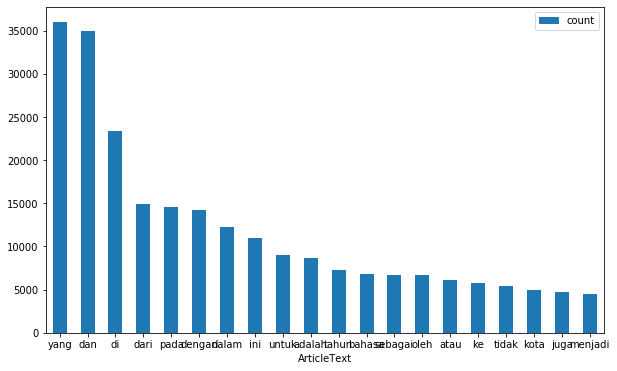

In [69]:
common_words = get_top_n_words(corpus_wiki, 20)

for word, freq in common_words:
    print(word, freq)

df2 = pd.DataFrame(common_words, columns = ['ArticleText' , 'count'])

ax = df2.plot.bar(x='ArticleText', y='count', rot=0)
plt.show()

fig = px.bar(df2, x='ArticleText', y='count')
fig.show()

In [93]:
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = set(stopwords.words('indonesian')) # stop words indonesia , untuk membuang kata2 yg kurang bermakna
stop_words.add('of')
stop_words.add('the')
stop_words.add('jpg')
stop_words.add('jmpl')
stop_words.add('px')
stop_words.add('cd')

In [94]:
def removeStopword(text,stop_words=stop_words): # membuang kata2 yang terdapat pada stopwords id
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [95]:
corpus_wiki_sw = [removeStopword(article) for article in corpus_wiki]

bahasa 6849
kota 4926
negara 3588
orang 3482
memiliki 3429
indonesia 3036
kabupaten 3034
wilayah 2337
daerah 2319
dunia 2092
barat 2092
kitab 1995
abad 1974
timur 1885
pulau 1823
nama 1817
jawa 1767
berkas 1753
air 1731
kategori 1729


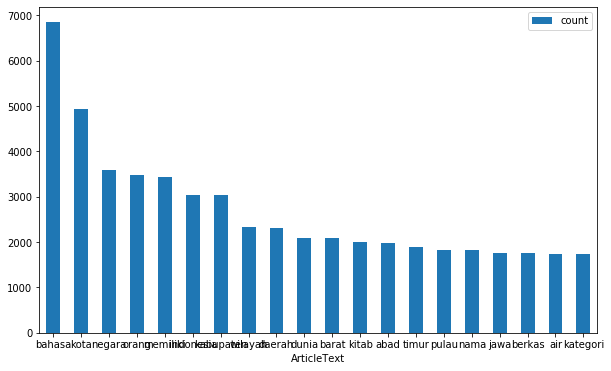

In [80]:
common_words = get_top_n_words(corpus_wiki_sw, 20)

for word, freq in common_words:
    print(word, freq)

df2 = pd.DataFrame(common_words, columns = ['ArticleText' , 'count'])

ax = df2.plot.bar(x='ArticleText', y='count', rot=0)
plt.show()

fig = px.bar(df2, x='ArticleText', y='count')
fig.show()

In [82]:
def get_top_n_words(corpus, n=None):
    
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

pada tahun 2848
abad ke 1493
salah satu 1361
dalam bahasa 962
jpg jmpl 941
yang lebih 926
berasal dari 925
di dalam 866
di dunia 815
terdiri dari 792
hal ini 750
pada masa 695
saat ini 691
yang tidak 677
di bawah 671
amerika serikat 656
britania raya 651
sebagian besar 646
di mana 646
ibu kota 642


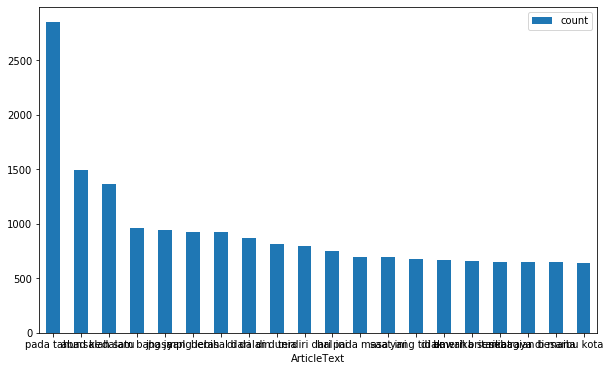

In [83]:
common_words = get_top_n_words(corpus_wiki, 20)

for word, freq in common_words:
    print(word, freq)

df2 = pd.DataFrame(common_words, columns = ['ArticleText' , 'count'])

ax = df2.plot.bar(x='ArticleText', y='count', rot=0)
plt.show()

fig = px.bar(df2, x='ArticleText', y='count')
fig.show()

amerika serikat 656
britania raya 651
orang orang 513
bahasa inggris 426
negara negara 426
bahasa melayu 370
bandar lampung 368
bahasa indonesia 337
undang undang 325
bahasa bahasa 297
april april 295
air terjun 287
jawa timur 266
perang dunia 264
bahasa jawa 264
kota kota 262
kitab kitab 258
republik indonesia 252
hong kong 250
bintang bintang 237


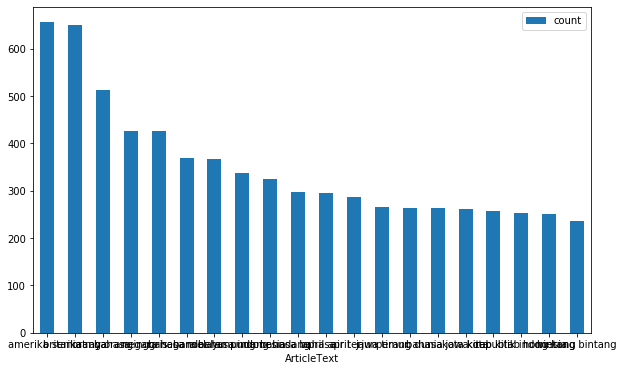

In [88]:
common_words = get_top_n_words(corpus_wiki_sw, 20)

for word, freq in common_words:
    print(word, freq)

df2 = pd.DataFrame(common_words, columns = ['ArticleText' , 'count'])

ax = df2.plot.bar(x='ArticleText', y='count', rot=0)
plt.show()

fig = px.bar(df2, x='ArticleText', y='count')
fig.show()

In [97]:
def get_top_n_words(corpus, n=None):
    
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

pada abad ke 456
adalah salah satu 275
merupakan salah satu 263
jpg jmpl px 244
yang berasal dari 243
px px px 228
april april april 219
al qur an 215
yang terdiri dari 187
abad ke sm 184
referensi pranala luar 182
perang dunia ii 174
yang ada di 174
jpg jmpl ka 166
jpg jmpl kiri 159
pada tahun dan 158
salah satu dari 156
awal abad ke 152
yang berada di 150
yang terletak di 144


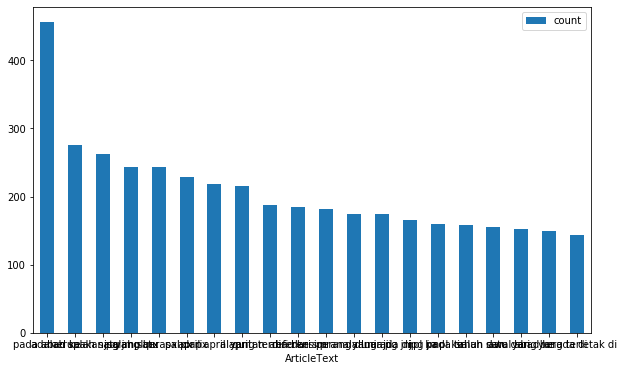

In [90]:
common_words = get_top_n_words(corpus_wiki, 20)

for word, freq in common_words:
    print(word, freq)

df2 = pd.DataFrame(common_words, columns = ['ArticleText' , 'count'])

ax = df2.plot.bar(x='ArticleText', y='count', rot=0)
plt.show()

fig = px.bar(df2, x='ArticleText', y='count')
fig.show()

april april april 219
al qur an 215
perang dunia ii 177
undang undang nomor 94
perangkat lunak bebas 82
kota bandar lampung 77
negeri bandar lampung 67
april april maret 62
sumber daya alam 61
bahasa inggris bahasa 58
dewan perwakilan kecamatan 58
situs web resmi 57
republik rakyat tiongkok 56
bintang bintang bintang 55
jakarta barat smp 55
perserikatan bangsa bangsa 53
barat smp negeri 51
naskah laut mati 50
nama bahasa arti 50
daftar kabupaten kota 49


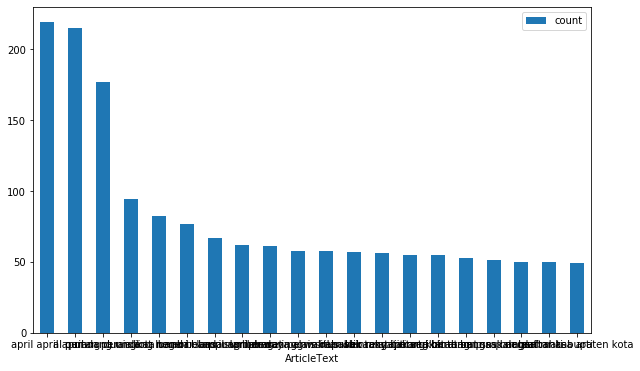

In [98]:
common_words = get_top_n_words(corpus_wiki_sw, 20)

for word, freq in common_words:
    print(word, freq)

df2 = pd.DataFrame(common_words, columns = ['ArticleText' , 'count'])

ax = df2.plot.bar(x='ArticleText', y='count', rot=0)
plt.show()

fig = px.bar(df2, x='ArticleText', y='count')
fig.show()

In [99]:
def get_top_n_words(corpus, n=None):
    
    vec = CountVectorizer(ngram_range=(4, 4)).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

april april april april 156
april april april maret 56
jakarta barat smp negeri 51
daftar bintang bintang bintang 43
bintang bintang bintang rasi 43
bintang bintang rasi nama 43
pranala situs web resmi 41
daftar bupati dewan perwakilan 40
melayu melayu melayu melayu 38
kondisi nama bahasa arti 36
bupati dewan perwakilan kecamatan 36
pemerintahan daftar bupati dewan 35
april maret april april 34
maret april april april 34
bandar lampung smp negeri 33
april april maret april 32
daftar kabupaten kota provinsi 32
negeri bandar lampung smp 32
smp negeri bandar lampung 31
lampung smp negeri bandar 30


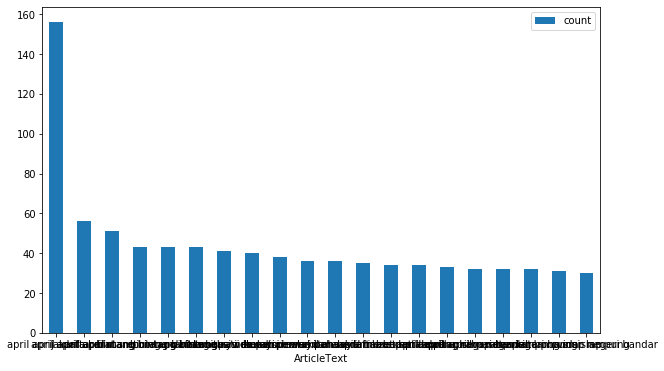

In [100]:
common_words = get_top_n_words(corpus_wiki_sw, 20)

for word, freq in common_words:
    print(word, freq)

df2 = pd.DataFrame(common_words, columns = ['ArticleText' , 'count'])

ax = df2.plot.bar(x='ArticleText', y='count', rot=0)
plt.show()

fig = px.bar(df2, x='ArticleText', y='count')
fig.show()

april april april april 156
april april april maret 56
jakarta barat smp negeri 51
daftar bintang bintang bintang 43
bintang bintang bintang rasi 43
bintang bintang rasi nama 43
pranala situs web resmi 41
daftar bupati dewan perwakilan 40
melayu melayu melayu melayu 38
kondisi nama bahasa arti 36
bupati dewan perwakilan kecamatan 36
pemerintahan daftar bupati dewan 35
april maret april april 34
maret april april april 34
bandar lampung smp negeri 33
april april maret april 32
daftar kabupaten kota provinsi 32
negeri bandar lampung smp 32
smp negeri bandar lampung 31
lampung smp negeri bandar 30


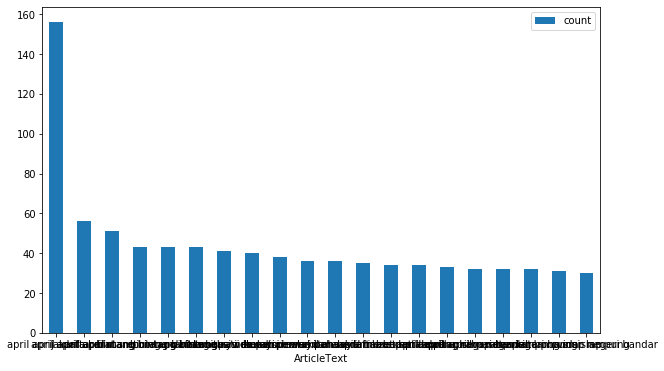

In [101]:
common_words = get_top_n_words(corpus_wiki_sw, 20)

for word, freq in common_words:
    print(word, freq)

df2 = pd.DataFrame(common_words, columns = ['ArticleText' , 'count'])

ax = df2.plot.bar(x='ArticleText', y='count', rot=0)
plt.show()

fig = px.bar(df2, x='ArticleText', y='count')
fig.show()